<a href="https://colab.research.google.com/github/rossl18/NumericalMethods/blob/main/BVPandOrbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Body Orbit w/ Assumptions:

Since $m_1$ = $m_2$ = $m_3$ = $g$ = $1$, the equations for each body simplify:
</br></br>

\begin{align}
  x_1' &= v_{1x} \\
  v_{1x}' &=
    \frac{(x_2-x_1)}
      {[(x_2-x_1)^2+(y_2-y_1)^2]^{\frac{3}{2}}} +
    \frac{(x_3-x_1)}
      {[(x_3-x_1)^2+(y_3-y_1)^2]^{\frac{3}{2}}} \\
  \\
  y_1' &= v_{1y} \\
  v_{1y}' &=
    \frac{(y_2-y_1)}
      {[(x_2-x_1)^2+(y_2-y_1)^2]^{\frac{3}{2}}} +
    \frac{(y_3-y_1)}
      {[(x_3-x_1)^2+(y_3-y_1)^2]^{\frac{3}{2}}}.
\end{align}

Using symmetry, we can find the equations to the other two as well:


\begin{align}
  x_2' &= v_{2x} \\
  v_{2x}' &=
    \frac{(x_1-x_2)}
      {[(x_1-x_2)^2+(y_1-y_2)^2]^{\frac{3}{2}}} +
    \frac{(x_3-x_2)}
      {[(x_3-x_2)^2+(y_3-y_2)^2]^{\frac{3}{2}}} \\
  \\
  y_2' &= v_{2y} \\
  v_{2y}' &=
    \frac{(y_1-y_2)}
      {[(x_1-x_2)^2+(y_1-y_2)^2]^{\frac{3}{2}}} +
    \frac{(y_3-y_2)}
      {[(x_3-x_2)^2+(y_3-y_2)^2]^{\frac{3}{2}}}.
\end{align}

And similarly

\begin{align}
  x_3' &= v_{3x} \\
  v_{3x}' &=
    \frac{(x_1-x_3)}
      {[(x_1-x_3)^2+(y_1-y_3)^2]^{\frac{3}{2}}} +
    \frac{(x_3-x_2)}
      {[(x_2-x_3)^2+(y_2-y_3)^2]^{\frac{3}{2}}} \\
  \\
  y_3' &= v_{3y} \\
  v_{3y}' &=
    \frac{(y_1-y_3)}
      {[(x_1-x_3)^2+(y_1-y_3)^2]^{\frac{3}{2}}} +
    \frac{(y_3-y_2)}
      {[(x_2-x_3)^2+(y_2-y_3)^2]^{\frac{3}{2}}}.
\end{align}
</br>
</br></br>

initial conditions:


\begin{align}
  (x_1,y_1) &= (-0.970,0.243) \\
  (x_1',y_1') &= (-0.466,-0.433) \\
  (x_2,y_2) &= (0.970,-0.243) \\
  (x_2',y_2') &= (-0.466,-0.433) \\
  (x_3,y_3) &= (0,0) \\
  (x_3',y_3') &= (0.932, 0.866)
\end{align}

Used google to find period of 3 body orbit was around 6 units, so will use interval $t = [0, 13]$
</br>


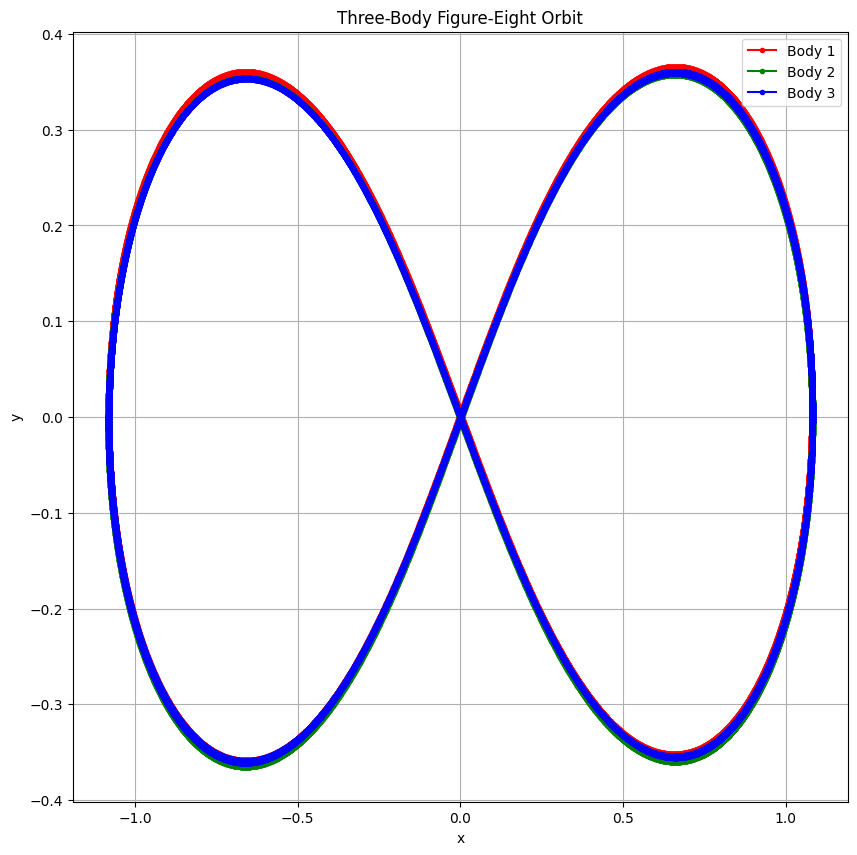

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def euler_step(t, x, h, ydot):
    return x + h * ydot(t, x)

def trap_step(t, x, h, ydot):
    z1 = ydot(t, x)
    g = x + h * z1
    z2 = ydot(t + h, g)
    y = x + h * (z1 + z2) / 2
    return y


def ydot(t, ax):
    x1, v1x, y1, v1y, x2, v2x, y2, v2y, x3, v3x, y3, v3y = ax

    r12 = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = math.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = math.sqrt((x2 - x3)**2 + (y2 - y3)**2)

    fx1 = (x2 - x1) / r12**3 + (x3 - x1) / r13**3
    fy1 = (y2 - y1) / r12**3 + (y3 - y1) / r13**3
    fx2 = (x1 - x2) / r12**3 + (x3 - x2) / r23**3
    fy2 = (y1 - y2) / r12**3 + (y3 - y2) / r23**3
    fx3 = (x1 - x3) / r13**3 + (x2 - x3) / r23**3
    fy3 = (y1 - y3) / r13**3 + (y2 - y3) / r23**3

    return np.array([v1x, fx1, v1y, fy1, v2x, fx2, v2y, fy2, v3x, fx3, v3y, fy3])

t = [0, 13]
n, p = 100000, 20000
h = (t[1] - t[0]) / n

ic = np.array([-0.970, -0.466, 0.243, -0.433, 0.970, -0.466, -0.243, -0.433, 0, 0.932, 0, 0.866])


ds = np.zeros((p + 1, 1 + len(ic)))
ds[0, 1:len(ic) + 1] = ic

t1 = t2 = t[0]
y1 = y2 = ic
for k in range(p):
    for i in range(round(n / p)):
        t2 += h
        y2 = trap_step(t1, y1, h, ydot)
        t1, y1 = t2, y2
    ds[k + 1, 0] = t2
    ds[k + 1, 1:len(y2) + 1] = y2


nCol = ['t', 'x1', 'v1x', 'y1', 'v1y', 'x2', 'v2x', 'y2', 'v2y', 'x3', 'v3x', 'y3', 'v3y']
df = pd.DataFrame(data=ds, columns=nCol)
plt.figure(figsize=(10, 10))
plt.plot(df['x1'], df['y1'], label='Body 1', marker='.', color='red')
plt.plot(df['x2'], df['y2'], label='Body 2', marker='.', color='green')
plt.plot(df['x3'], df['y3'], label='Body 3', marker='.', color='blue')
plt.title('Three-Body Figure-Eight Orbit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#Sensitivity Testing
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Three-Body Figure-Eight Orbit Sensitivity Analysis')
for k in range(1, 6):
    ic2 = np.copy(ic)
    ic2[9] += 10**(-k)

    ds2 = np.zeros((p + 1, 1 + len(ic2)))
    ds2[0, 1:len(ic2) + 1] = ic2

    t1 = t2 = t[0]
    y1 = y2 = ic2
    for j in range(p):
        for i in range(round(n / p)):
            t2 += h
            y2 = trap_step(t1, y1, h, ydot)
            t1, y1 = t2, y2
        ds2[j + 1, 0] = t2
        ds2[j + 1, 1:len(y2) + 1] = y2

    df2 = pd.DataFrame(data=ds2, columns=['t', 'x1', 'v1x', 'y1', 'v1y', 'x2', 'v2x', 'y2', 'v2y', 'x3', 'v3x', 'y3', 'v3y'])
    ax = axs[(k-1) // 3, (k-1) % 3] # Select subplot position
    ax.plot(df2['x1'], df2['y1'], label='Body 1', color='red')
    ax.plot(df2['x2'], df2['y2'], label='Body 2', color='green')
    ax.plot(df2['x3'], df2['y3'], label='Body 3', color='blue')
    ax.set_title(f'v3x adjusted by +10^-{k}')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Error at t = 1 is: 0.002657549467865901


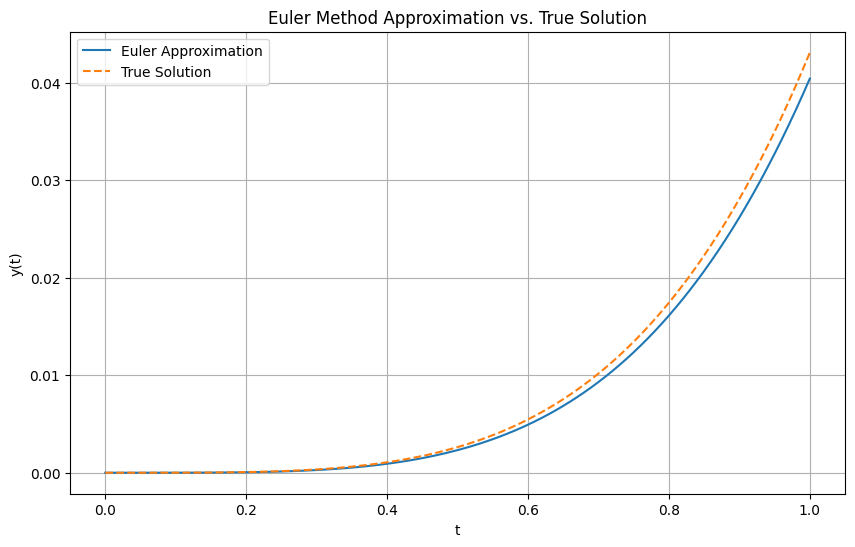

In [ ]:
#Euler Approximation
import numpy as np
import matplotlib.pyplot as plt

def system(t, y, z, w):
    return z, w, t + z

def euler_method(f, t0, y0, z0, w0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros_like(t_values)
    z_values = np.zeros_like(t_values)
    w_values = np.zeros_like(t_values)
    y_values[0], z_values[0], w_values[0] = y0, z0, w0

    for i in range(1, len(t_values)):
        y_prime, z_prime, w_prime = f(t_values[i-1], y_values[i-1], z_values[i-1], w_values[i-1])
        y_values[i] = y_values[i-1] + h * y_prime
        z_values[i] = z_values[i-1] + h * z_prime
        w_values[i] = w_values[i-1] + h * w_prime

    return t_values, y_values

def plot_euler_solution(f, t0, y0, z0, w0, h, t_end):
    t_values, y_values = euler_method(f, t0, y0, z0, w0, h, t_end)
    true_y_values = 0.5 * (np.exp(t_values) + np.exp(-t_values) - t_values**2) - 1
    error_at_t1 = np.abs(true_y_values[-1] - y_values[-1])
    print("Error at t = 1 is: " + str(error_at_t1))
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, y_values, label='Euler Approximation')
    plt.plot(t_values, true_y_values, label='True Solution', linestyle='--')
    plt.title('Euler Method Approximation vs. True Solution')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

t0, y0, z0, w0 = 0, 0, 0, 0
h = 0.01
t_end = 1
plot_euler_solution(system, t0, y0, z0, w0, h, t_end)

#Error at t = 1 is: 0.002657549467865901

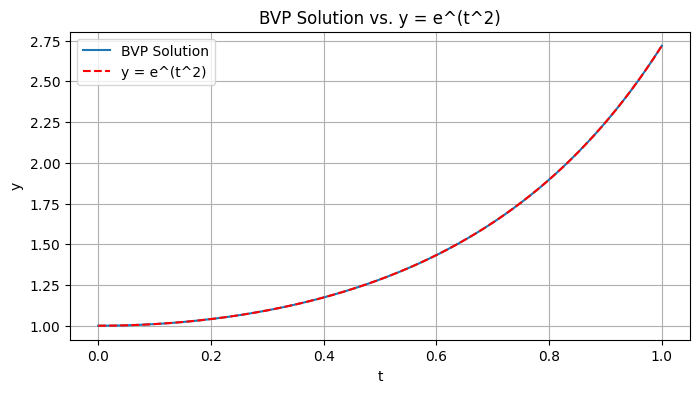

In [ ]:
#BVP
from scipy.integrate import solve_bvp
import numpy as np
import math
def ode_system(t, y):
    return np.vstack((y[1], (2 + 4*t**2)*y[0]))

def bc(ya, yb):
    return np.array([ya[0] - 1, yb[0] - math.e])

t = np.linspace(0, 1, 1000)
y_guess = np.zeros((2, t.size))
y_guess[0] = np.exp(t**2)
sol = solve_bvp(ode_system, bc, t, y_guess)
t_plot = np.linspace(0, 1, 1000)
y_plot = sol.sol(t_plot)[0]
plt.figure(figsize=(8, 4))
plt.plot(t_plot, y_plot, label='BVP Solution')
plt.plot(t_plot, np.exp(t_plot**2), 'r--', label='y = e^(t^2)')
plt.title('BVP Solution vs. y = e^(t^2)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()




0701 c3.b) iteration 16, s = [0.000091553,0.000106812]



,y_act,t1,y1,y1',t2,y2,y2'
0,1.00000000,0.00000000,1.00000000,0.00009155,0.00000000,1.00000000,0.00010681
1,1.00000031,0.00054715,1.00000035,0.00118585,0.00055543,1.00000037,0.00121766
2,1.00003733,0.00601864,1.00003678,0.01212928,0.00610969,1.00003798,0.01232665
3,1.00380824,0.06073358,1.00370095,0.12200793,0.06165233,1.00381484,0.12388146
4,1.27325440,0.48930420,1.27058000,1.24342955,0.49150396,1.27333293,1.25173691
5,2.71828183,1.00000000,2.71826135,5.43871418,1.00000000,2.71829208,5.43873525


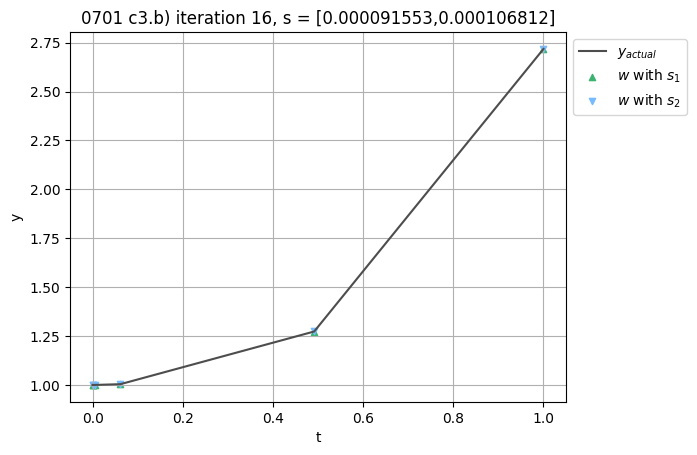

In [ ]:
#IVP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

def main():
  yact = lambda t: math.e**(t**2)
  bv = [1, math.e]
  tt = [0,1]

  def ydot(t,y):
    dy = np.zeros_like(y)
    dy[0] = y[1] #'
    dy[1] = ((2+4*(t**2))*y[0])
    return dy

  ic = np.array([0,bv[0]])
  tol = 1e-5

  s1 = -0.5
  s2 = 0.5
  imax = 20
  i = 0
  while (abs((s2-s1)/2) > tol) and (i<imax):
    ic = [bv[0],s1]
    sol1 = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    ic = [bv[0],s2]
    sol2 = sp.integrate.solve_ivp(ydot,tt,ic)

    size1 = sol1.t.size
    size2 = sol2.t.size
    err1 = bv[1] - sol1.y[0][size1-1]
    err2 = bv[1] - sol2.y[0][size2-1]
    if err1*err2 > 0 :
      print("choose different s1,s2")
      break

    sc = (s1+s2)/2
    ic = [bv[0],sc]
    solc = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    sizec = solc.t.size
    errc = bv[1] - solc.y[0][sizec-1]
    if err1*errc < 0 :
      s2 = sc
      sol2 = solc
      size2 = sizec
      err2 = errc
    else:
      s1 = sc
      sol1 = solc
      size1 = sizec
      err1 = errc

    i += 1

  ds = np.empty((max(size1,size2),1+3*2))
  ds[:] = np.nan
  if size1 > size2:
    ds[0:size1,0] = yact(sol1.t)
    cx = "t1"
  else:
    ds[0:size2,0] = yact(sol2.t)
    cx = "t2"
  ds[0:size1,1] = sol1.t
  ds[0:size1,2] = sol1.y[0]
  ds[0:size1,3] = sol1.y[1]
  ds[0:size2,4] = sol2.t
  ds[0:size2,5] = sol2.y[0]
  ds[0:size2,6] = sol2.y[1]


  s_title = "0701 c3.b) iteration " + str(i) + ", s = [" + "{:10.9f}".format(s1) +"," + "{:10.9f}".format(s2) + "]"
  print(f"\n\n"+s_title+"\n")
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",8)
  df = pd.DataFrame(data=ds,columns=["y_act","t1","y1","y1'","t2","y2","y2'"])
  if True:
    display(df)
    print()


  if True:
    ax1  = df.plot(x=cx,y="y_act",label="$y_{actual}$",color="0.3")
    ax12 = df.plot(x="t2",y="y1",label="$w$ with $s_1$",ax=ax1,color="mediumseagreen",marker="^",kind="scatter")
    ax11 = df.plot(x="t2",y="y2",label="$w$ with $s_2$",ax=ax1,color="xkcd:sky blue",marker="v",kind="scatter")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()
